In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('store_catogory_total.csv', encoding = 'cp949')
df.shape

(4300, 6)

In [5]:
df.head()

,No,Name,Store_name,Franchise,Category,Luxury
0,1,스타필드 하남,ABC마트,프랜차이즈,패션,0
1,2,스타필드 하남,CM900,프랜차이즈,패션,0
2,3,스타필드 하남,CM900,프랜차이즈,패션,0
3,4,스타필드 하남,H&M,프랜차이즈,패션,0
4,5,스타필드 하남,HAS,프랜차이즈,패션,0


In [7]:
category_count = df['Name'].value_counts()
category_count

가든파이브       1527
테크노마트 강변     886
아이파크몰 용산     383
디큐브시티        370
스타필드 코엑스     274
스타필드 하남      274
롯데몰 은평       189
타임스퀘어        186
IFC몰         108
롯데몰 김포       103
Name: Name, dtype: int64

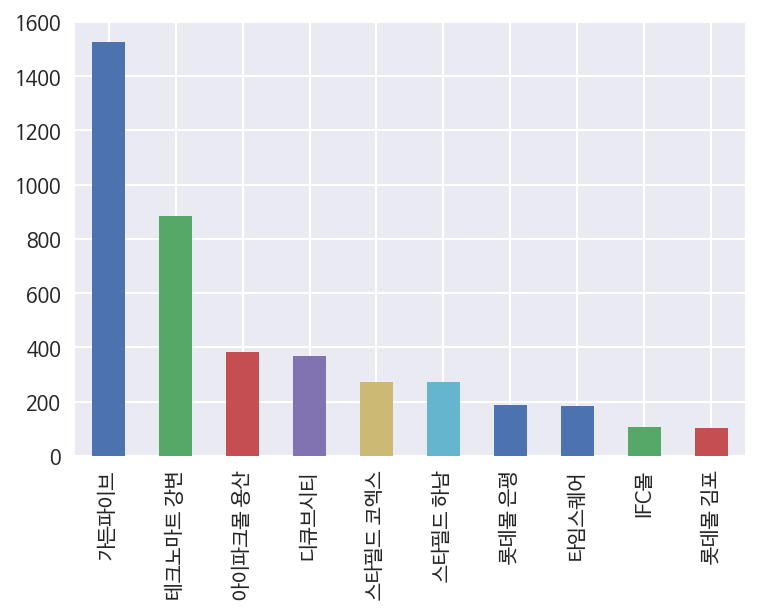

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = 'NanumBarunGothic'
category_count.plot(kind='bar')

In [12]:
# 가든파이브에 매장이 진짜 많네 어떤게 있을까
df.loc[df['Name']=='가든파이브'].head()

,No,Name,Store_name,Franchise,Category,Luxury
1817,1818,가든파이브,리틀갤러리가바,개인,식음료,0
1818,1819,가든파이브,비에이치씨 가든파이브,프랜차이즈,식음료,0
1819,1820,가든파이브,에스피커뮤니티,개인,식음료,0
1820,1821,가든파이브,CAFE올리브,개인,식음료,0
1821,1822,가든파이브,GS25 가든파이브,프랜차이즈,식음료,0


In [16]:
pd.crosstab(
    df.Name,
    df.Category,
    margins=True,
)

Category,기타,식음료,전자,패션,All
Name,,,,,
IFC몰,3,45,2,58,108
가든파이브,787,86,96,558,1527
디큐브시티,12,75,9,274,370
롯데몰 김포,7,43,1,52,103
롯데몰 은평,14,51,2,122,189
스타필드 코엑스,25,99,3,147,274
스타필드 하남,33,53,2,186,274
아이파크몰 용산,40,78,3,262,383
타임스퀘어,15,69,1,101,186


# 참조 [pandas.DataFrame.unstack](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html)

In [18]:
df.groupby(["Name", "Category"]).size().unstack(1)

Category,기타,식음료,전자,패션
Name,,,,
IFC몰,3,45,2,58
가든파이브,787,86,96,558
디큐브시티,12,75,9,274
롯데몰 김포,7,43,1,52
롯데몰 은평,14,51,2,122
스타필드 코엑스,25,99,3,147
스타필드 하남,33,53,2,186
아이파크몰 용산,40,78,3,262
타임스퀘어,15,69,1,101


In [21]:
temp_df = df.groupby(["Name", "Category"]).size().unstack(0)
temp_df

Name,IFC몰,가든파이브,디큐브시티,롯데몰 김포,롯데몰 은평,스타필드 코엑스,스타필드 하남,아이파크몰 용산,타임스퀘어,테크노마트 강변
Category,,,,,,,,,,
기타,3,787,12,7,14,25,33,40,15,54
식음료,45,86,75,43,51,99,53,78,69,81
전자,2,96,9,1,2,3,2,3,1,631
패션,58,558,274,52,122,147,186,262,101,120


In [22]:
# temp_df.sum(axis=1)
result_df = temp_df.div(temp_df.sum(axis=1), axis=0)
# 비율을 연산하는 과정                .sum() => .div()
result_df

Name,IFC몰,가든파이브,디큐브시티,롯데몰 김포,롯데몰 은평,스타필드 코엑스,스타필드 하남,아이파크몰 용산,타임스퀘어,테크노마트 강변
Category,,,,,,,,,,
기타,0.003030,0.794949,0.012121,0.007071,0.014141,0.025253,0.033333,0.040404,0.015152,0.054545
식음료,0.066176,0.126471,0.110294,0.063235,0.075000,0.145588,0.077941,0.114706,0.101471,0.119118
전자,0.002667,0.128000,0.012000,0.001333,0.002667,0.004000,0.002667,0.004000,0.001333,0.841333
패션,0.030851,0.296809,0.145745,0.027660,0.064894,0.078191,0.098936,0.139362,0.053723,0.063830


# 데이터 시각화

In [51]:
plt.rcParams['figure.figsize'] = (15,10)

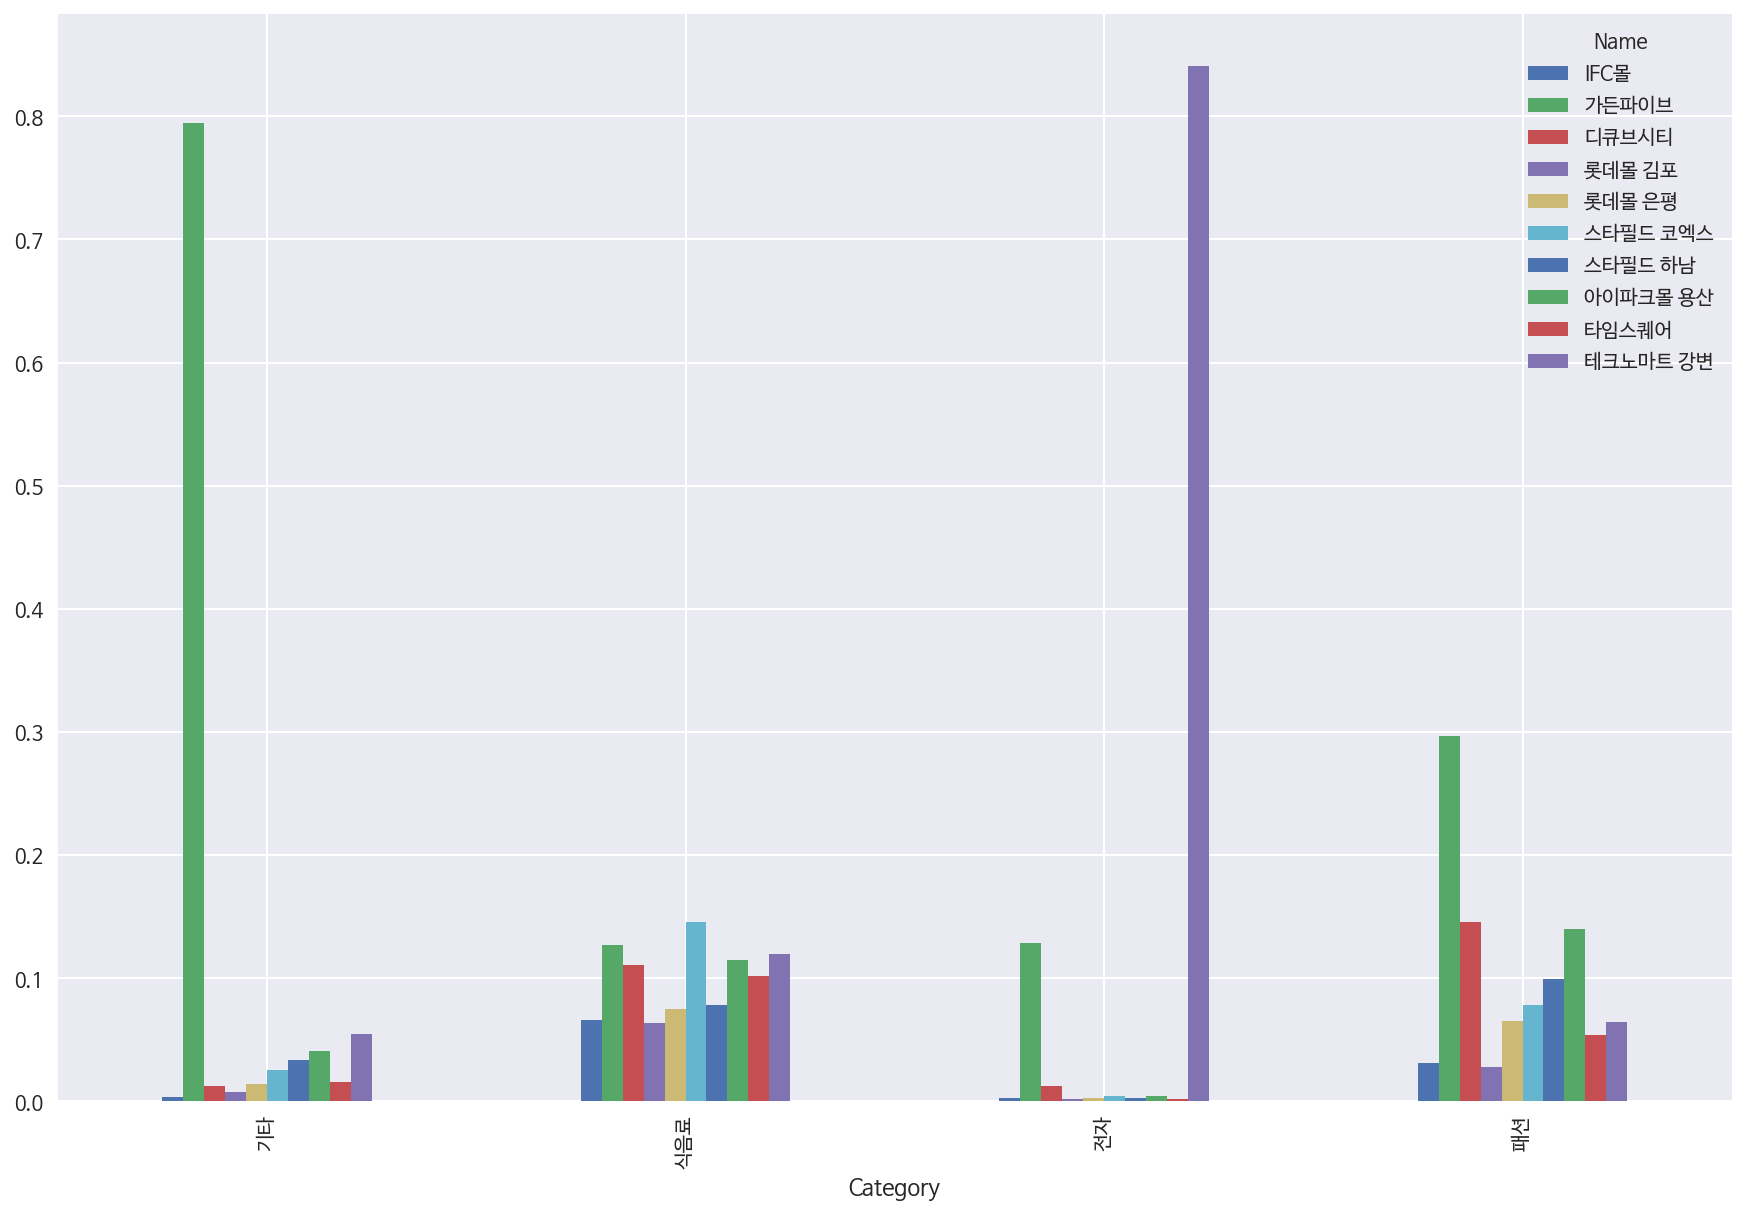

In [52]:
result_df.plot.bar()
# 지원 => Matplotlib API

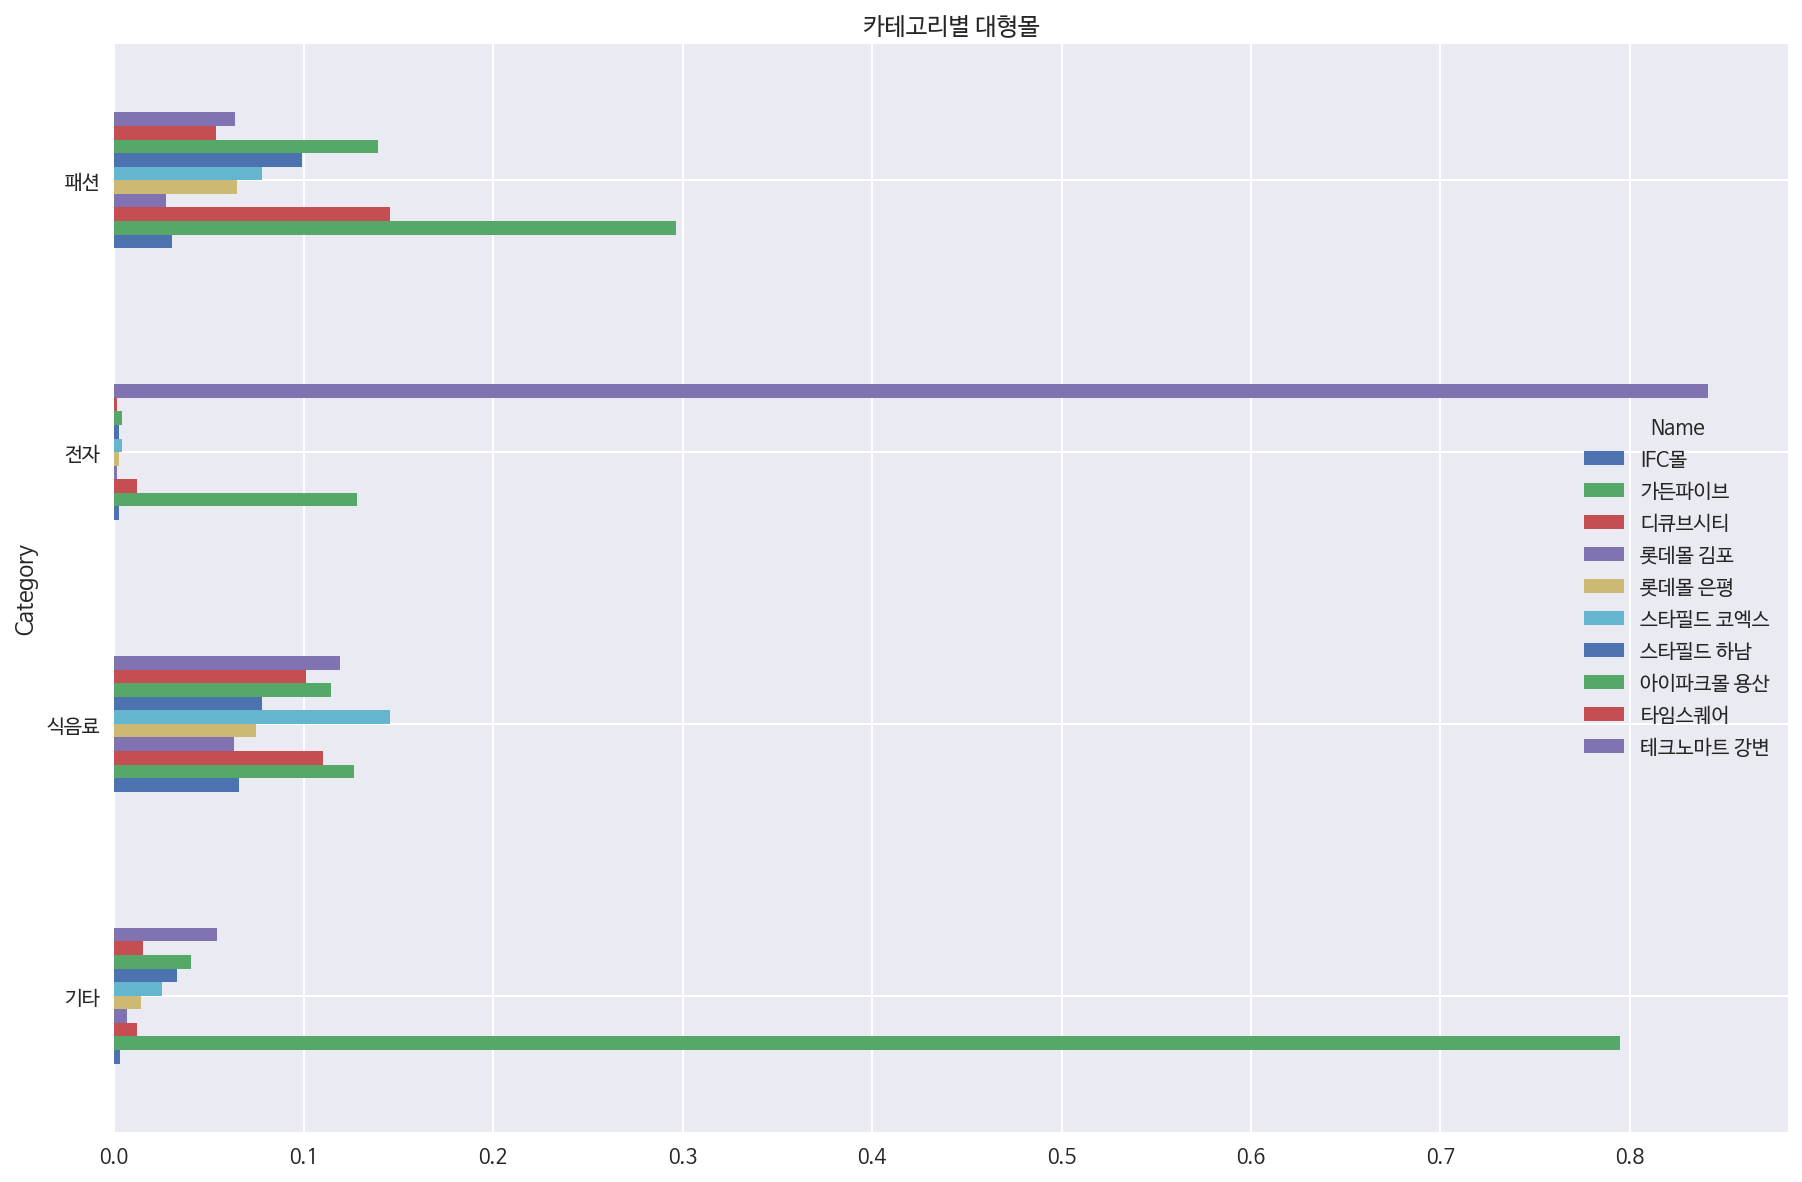

In [56]:
# result_df.plot.bar(title="Titanic")           # 특정kwargs O, X
ax = result_df.plot(kind="barh", title="카테고리별 대형몰")

# DataFrame. plot ( option )

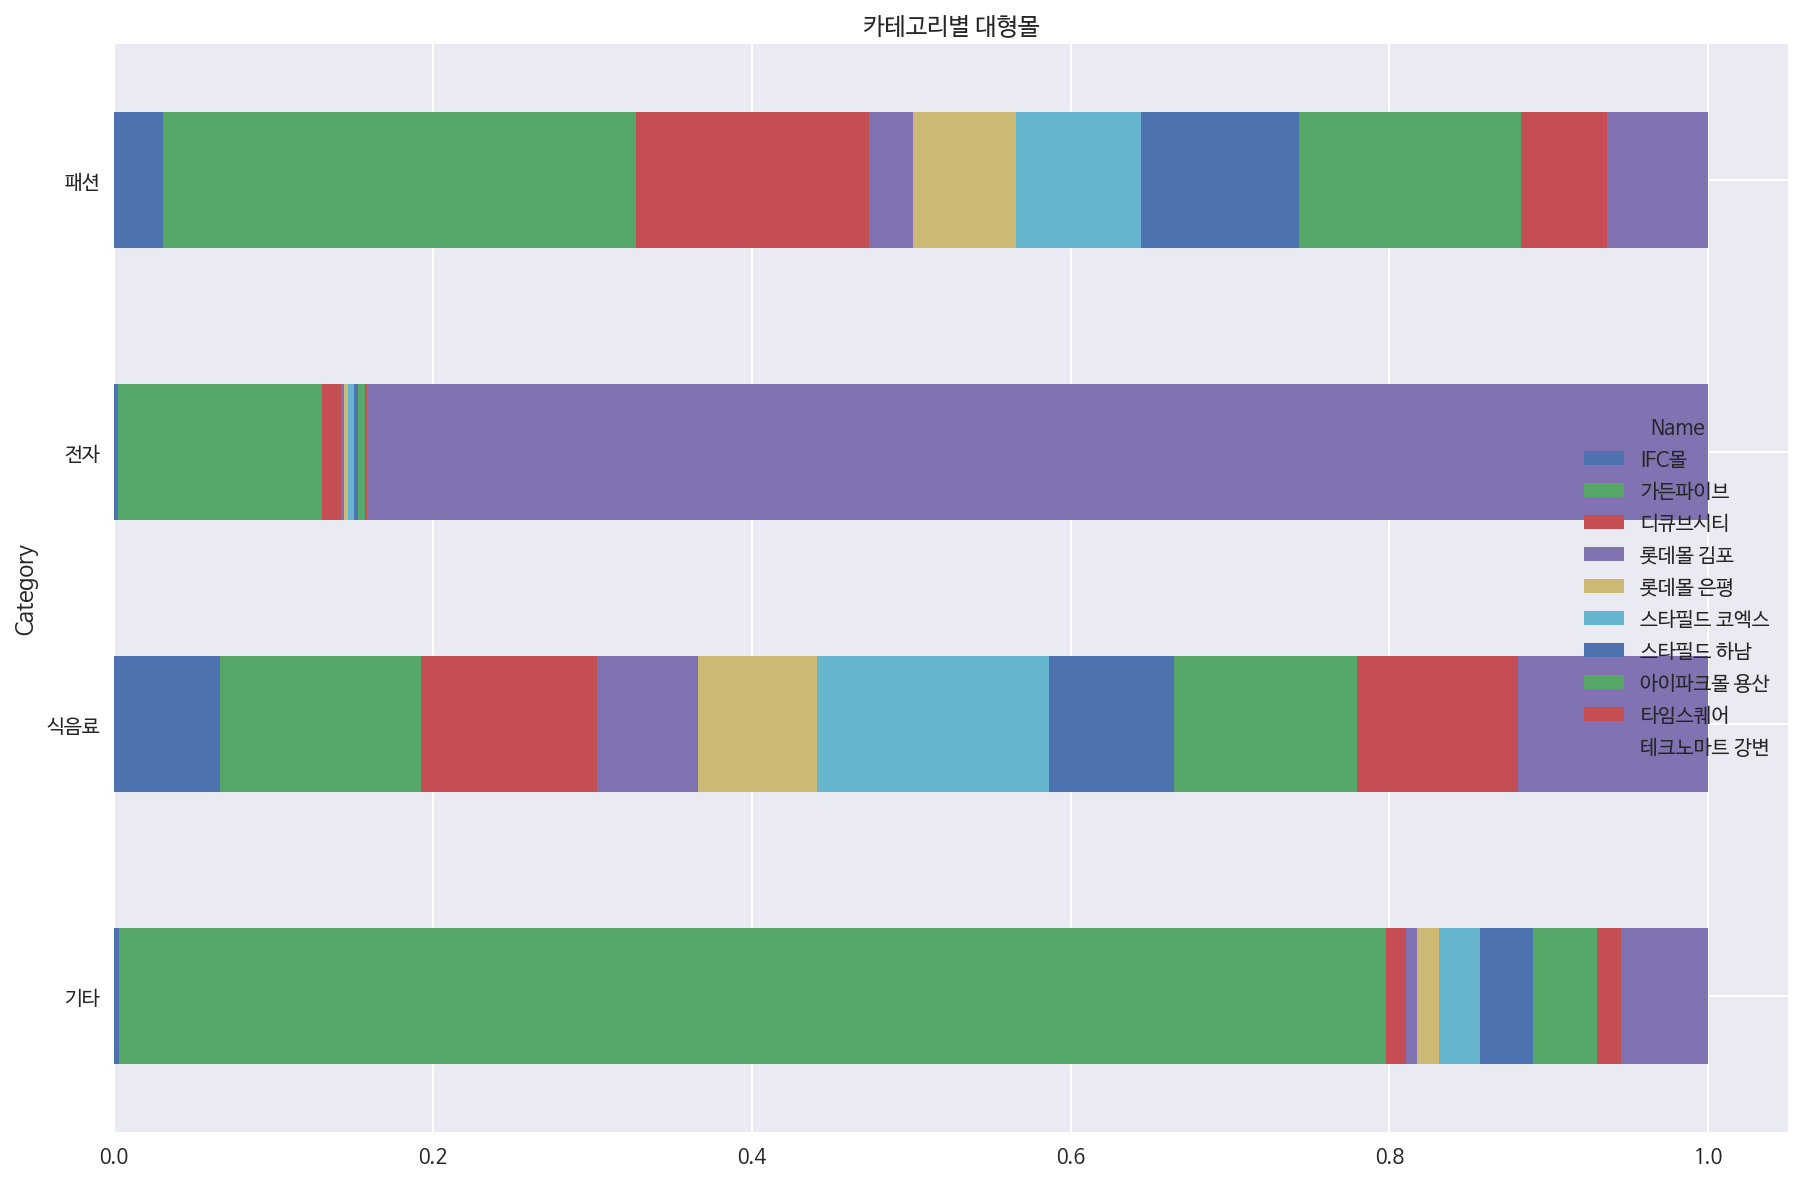

In [55]:
# result_df.plot.bar(title="Titanic")           # 특정kwargs O, X
ax = result_df.plot(kind="barh", title="카테고리별 대형몰", stacked=True)
ax
# DataFrame. plot ( option )
# import seaborn as sns

# 침침해 더 예쁘게 보기